### dataset

link: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

columns:

ORDERNUMBER – unique order identifier

QUANTITYORDERED – number of units sold

PRICEEACH – price per unit

ORDERLINENUMBER – order line number

SALES – total sales value for the order line

ORDERDATE – date when the order was placed

STATUS – order status (Shipped, Cancelled, On Hold, etc.)

QTR_ID – quarter of the year (1–4)

MONTH_ID – month of the year (1–12)

YEAR_ID – year of the order

PRODUCTLINE – product category

MSRP – manufacturer’s suggested retail price

PRODUCTCODE – unique product identifier

CUSTOMERNAME – customer name

PHONE – customer phone number

ADDRESSLINE1 / ADDRESSLINE2 – customer address

CITY – customer city

STATE – customer state

POSTALCODE – postal code

COUNTRY – customer country

TERRITORY – sales territory

CONTACTLASTNAME / CONTACTFIRSTNAME – customer contact person

DEALSIZE – size of the deal (Small, Medium, Large)

### Task 1: Data Loading

1. Load the dataset using pandas.
2. Display the first 10 rows of the dataset.
3. Print the shape of the dataset.
4. Display column names and data types.
5. Check for missing values in each column.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sales_data_sample.csv")
df = df
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [3]:
df.shape

(2823, 25)

In [4]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [5]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### Task 2: Data Cleaning & Preparation


1. Check for duplicate ORDERNUMBER and ORDERLINENUMBER combinations.
2. Remove duplicate records if any exist.
3. Convert ORDERDATE to datetime format.
4. Verify that QUANTITYORDERED, PRICEEACH, and SALES are positive.
5. Handle missing values in address-related columns (optional).

In [6]:
duplicated = df[df.duplicated(["ORDERNUMBER", "ORDERLINENUMBER"])]
duplicated

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [7]:
duplicated2 = df[df.duplicated()]
duplicated2

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [8]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])
df["ORDERDATE"].head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]

In [9]:
print("QUANTITYORDERED column's minimum value: ", df["QUANTITYORDERED"].min())
print("PRICEEACH column's minimum value: ", df["PRICEEACH"].min())
print("SALES column's minimum value: ", df["SALES"].min())

QUANTITYORDERED column's minimum value:  6
PRICEEACH column's minimum value:  26.88
SALES column's minimum value:  482.13


In [10]:
df = df.drop(columns=["ADDRESSLINE2", "STATE", "TERRITORY"], axis=1)
df = df.dropna()
df.shape

(2747, 22)

shape before: (2823, 25)

### Task 3: Descriptive Statistics


1. Compute mean, median, and standard deviation for:
    - QUANTITYORDERED
    - PRICEEACH
    - SALES
2. Find minimum and maximum sales value.
3. Group data by COUNTRY and calculate total sales.
4. Group data by PRODUCTLINE and compute total quantity sold.

In [11]:
print("Mean for QUANTITYORDERED: ", df["QUANTITYORDERED"].mean())
print("Median for QUANTITYORDERED: ", df["QUANTITYORDERED"].median())
print("Standard deviation for QUANTITYORDERED: ", df["QUANTITYORDERED"].std())

print("")

print("Mean for PRICEEACH: ", df["PRICEEACH"].mean())
print("Median for PRICEEACH: ", df["PRICEEACH"].median())
print("Standard deviation for PRICEEACH: ", df["PRICEEACH"].std())

print("")

print("Mean for SALES: ", df["SALES"].mean())
print("Median for SALES: ", df["SALES"].median())
print("Standard deviation for SALES: ", df["SALES"].std())

Mean for QUANTITYORDERED:  35.10302147797597
Median for QUANTITYORDERED:  35.0
Standard deviation for QUANTITYORDERED:  9.762135423504992

Mean for PRICEEACH:  83.64896614488534
Median for PRICEEACH:  95.55
Standard deviation for PRICEEACH:  20.144229455560847

Mean for SALES:  3553.0475828176195
Median for SALES:  3184.8
Standard deviation for SALES:  1838.953900544869


In [12]:
print("Minimum sales values: ", df["SALES"].min())
print("Maximum sales values: ", df["SALES"].max())

Minimum sales values:  482.13
Maximum sales values:  14082.8


In [13]:
countrySales = df.groupby("COUNTRY")["SALES"].sum()
print(countrySales)

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3355575.69
Name: SALES, dtype: float64


In [14]:
productQuantity = df.groupby("PRODUCTLINE")["QUANTITYORDERED"].sum()
print(productQuantity)

PRODUCTLINE
Classic Cars        33373
Motorcycles         11080
Planes              10636
Ships                7989
Trains               2712
Trucks and Buses    10579
Vintage Cars        20059
Name: QUANTITYORDERED, dtype: int64


### Task 4: Exploratory Data Analysis


1. Analyze sales distribution across different years.
2. Compare sales performance by deal size.
3. Identify top 5 countries by total revenue.
4. Analyze average order quantity per product line.

In [15]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [16]:
yearlySales = df.groupby("YEAR_ID")["SALES"].sum()
print(yearlySales)

YEAR_ID
2003    3353014.06
2004    4669924.56
2005    1737283.09
Name: SALES, dtype: float64


In [17]:
dealSizeSales = df.groupby("DEALSIZE")["SALES"].sum()
print(dealSizeSales)

DEALSIZE
Large     1258956.40
Medium    5931231.47
Small     2570033.84
Name: SALES, dtype: float64


In [18]:
countrySales = df.groupby("COUNTRY")["SALES"].sum()
countrySales = countrySales.sort_values(ascending=False)
countrySales.head()

COUNTRY
USA          3355575.69
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: SALES, dtype: float64

In [19]:
productQuantity = df.groupby("PRODUCTLINE")["QUANTITYORDERED"].sum()
avgProdQuant = productQuantity.mean()
avgProdQuant = round(avgProdQuant, 2)
avgProdQuant

np.float64(13775.43)

### Task 5: Data Visualization

1. Plot a histogram of SALES.
2. Create a boxplot of PRICEEACH by PRODUCTLINE.
3. Plot a time-series chart of monthly total sales.
4. Create a bar chart showing total sales by territory.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

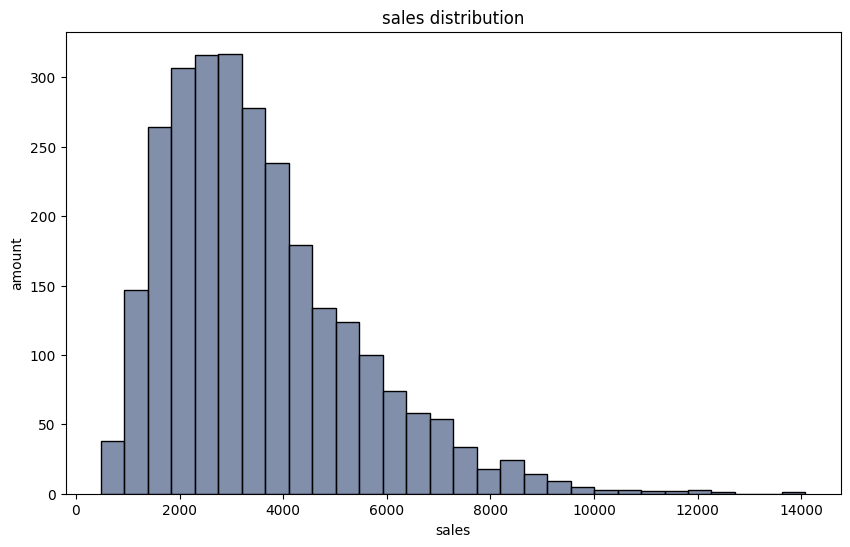

In [21]:
sales = df["SALES"]

plt.figure(figsize=(10, 6))
sns.histplot(sales, bins=30, color="#576A8F")
plt.title("sales distribution")
plt.xlabel("sales")
plt.ylabel("amount")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12196\3646116193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PRICEEACH', y='PRODUCTLINE', palette='pastel')


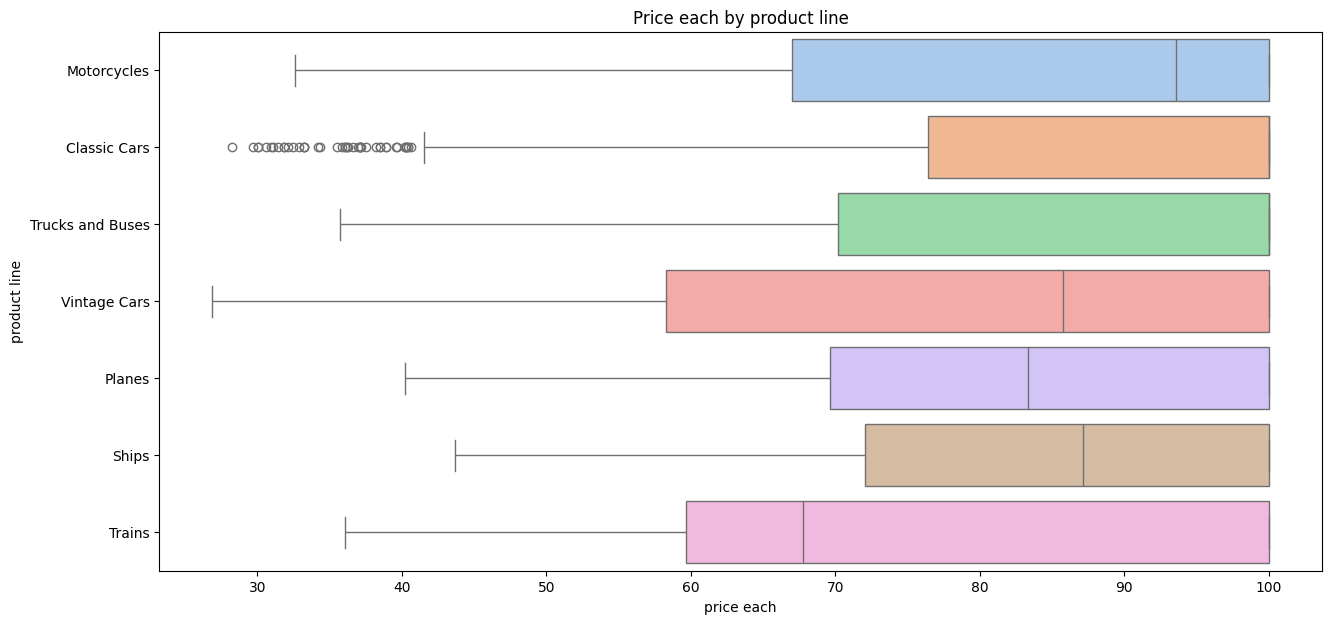

In [22]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='PRICEEACH', y='PRODUCTLINE', palette='pastel')
plt.title("Price each by product line")
plt.xlabel("price each")
plt.ylabel("product line")
plt.show()

Text(0, 0.5, 'Sales')

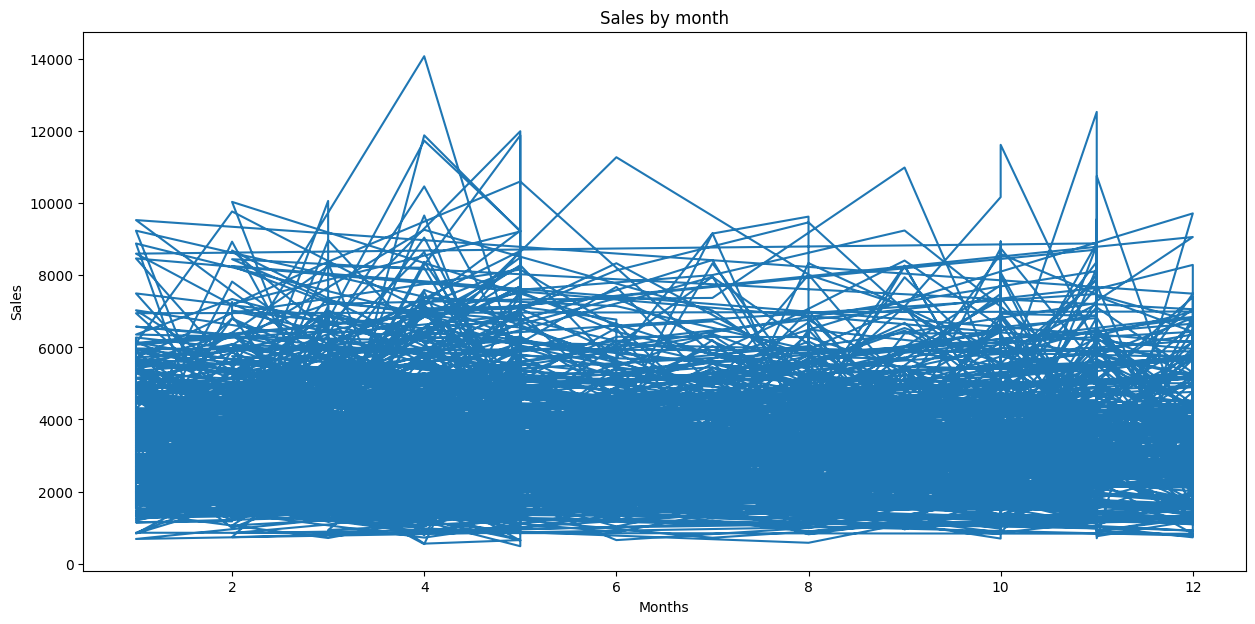

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(df.MONTH_ID, df.SALES)
plt.title('Sales by month')
plt.xlabel('Months')
plt.ylabel('Sales')

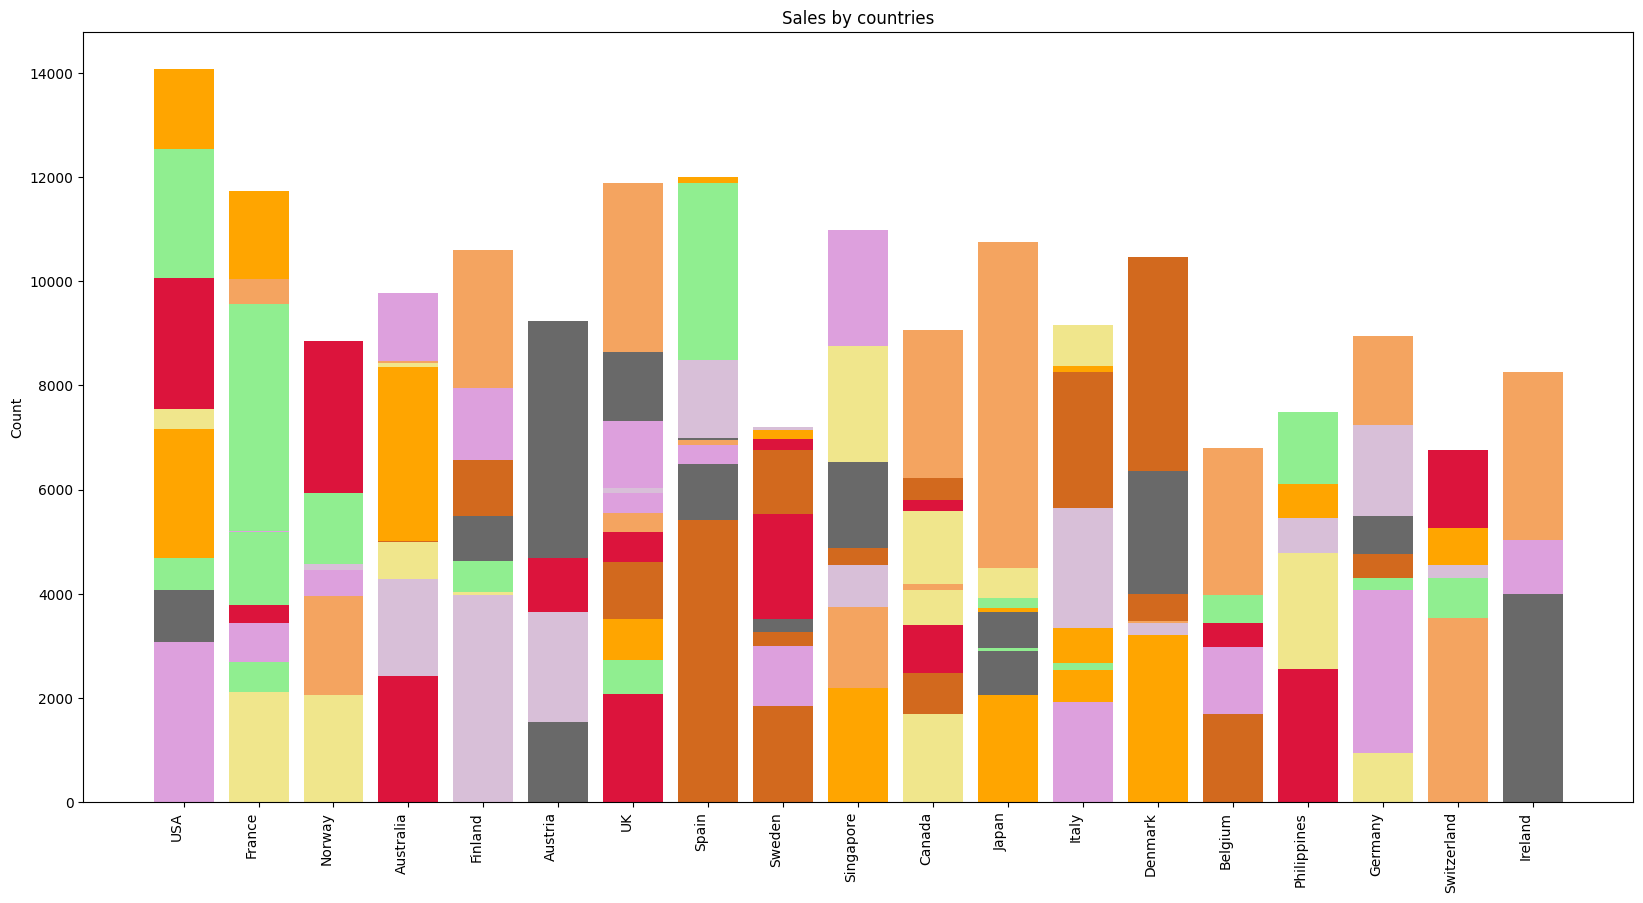

In [24]:
# I deleted TERRITORY column so I'll use COUNTRY column 
x = df["SALES"]
y = df["COUNTRY"]

colors = ["khaki", "plum", "crimson", "lightgreen", "orange", "dimgrey", "sandybrown", "thistle", "chocolate"]

plt.figure(figsize=(20,10))
plt.bar(y, x, color=colors)
plt.title("Sales by countries")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')

plt.show()

### Task 6: Feature Engineering

1. Create a new feature total_revenue_check: total_revenue_check = QUANTITYORDERED × PRICEEACH. Compare it with SALES.
2. Extract order_month and order_year from ORDERDATE.
3. Create a binary feature large_deal_flag:
    - 1 if DEALSIZE = "Large"
    - 0 otherwise
4. Encode categorical variables (PRODUCTLINE, COUNTRY, DEALSIZE).

In [25]:
df["total_revenue_check"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

print("Mean for total_revenue_check: ", df["total_revenue_check"].mean())
print("Median for total_revenue_check: ", df["total_revenue_check"].median())
print("Standard deviation for total_revenue_check: ", round(df["total_revenue_check"].std(), 2))
print("Minimum for total_revenue_check: ", df["total_revenue_check"].min())
print("Maximum for total_revenue_check: ", df["total_revenue_check"].max())

print("")

print("Mean for SALES: ", df["SALES"].mean())
print("Median for SALES: ", df["SALES"].median())
print("Standard deviation for SALES: ", round(df["SALES"].std(), 2))
print("Minimum for SALES: ", df["SALES"].min())
print("Maximum for SALES: ", df["SALES"].max())

Mean for total_revenue_check:  2937.642803057882
Median for total_revenue_check:  2800.0
Standard deviation for total_revenue_check:  1105.92
Minimum for total_revenue_check:  482.13
Maximum for total_revenue_check:  9048.16

Mean for SALES:  3553.0475828176195
Median for SALES:  3184.8
Standard deviation for SALES:  1838.95
Minimum for SALES:  482.13
Maximum for SALES:  14082.8


In [26]:
df["order_month"] = pd.to_datetime(df['ORDERDATE']).dt.month
df["order_year"] = pd.to_datetime(df['ORDERDATE']).dt.year
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,total_revenue_check,order_month,order_year
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2871.00,2,2003
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2765.90,5,2003
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,3884.34,7,2003
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,3746.70,8,2003
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,3479.76,10,2003


In [27]:
df["large_deal_flag"] = [1 if x == "Large" else 0 for x in df["DEALSIZE"]]
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,total_revenue_check,order_month,order_year,large_deal_flag
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,10022,USA,Yu,Kwai,Small,2871.00,2,2003,0
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,51100,France,Henriot,Paul,Small,2765.90,5,2003,0
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,75508,France,Da Cunha,Daniel,Medium,3884.34,7,2003,0
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,90003,USA,Young,Julie,Medium,3746.70,8,2003,0
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,Burlingame,94217,USA,Hirano,Juri,Medium,3479.76,10,2003,0


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df["PRODUCTLINE"].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [30]:
productLine = df["PRODUCTLINE"]

le = LabelEncoder()
df["PRODUCTLINE"] = le.fit_transform(productLine)
df["PRODUCTLINE"].unique()

array([1, 0, 5, 6, 2, 3, 4])

In [31]:
df["COUNTRY"].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [32]:
countries = df["COUNTRY"]

le = LabelEncoder()
df["COUNTRY"] = le.fit_transform(countries)
df["COUNTRY"].unique()

array([18,  6, 11,  0,  5,  1, 17, 14, 15, 13,  3, 10,  9,  4,  2, 12,  7,
       16,  8])

In [33]:
df["DEALSIZE"].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [34]:
df["DEALSIZE"].replace(['Small', 'Medium', 'Large'], [0, 1, 2], inplace=True)
df["DEALSIZE"].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12196\4005275090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DEALSIZE"].replace(['Small', 'Medium', 'Large'], [0, 1, 2], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12196\4005275090.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

array([0, 1, 2])

### Task 7: Correlation Analysis

1. Compute correlation matrix for numerical features.
2. Visualize correlations using a heatmap.
3. Identify features most correlated with SALES.

In [35]:
df.dtypes

ORDERNUMBER                     int64
QUANTITYORDERED                 int64
PRICEEACH                     float64
ORDERLINENUMBER                 int64
SALES                         float64
ORDERDATE              datetime64[ns]
STATUS                         object
QTR_ID                          int64
MONTH_ID                        int64
YEAR_ID                         int64
PRODUCTLINE                     int64
MSRP                            int64
PRODUCTCODE                    object
CUSTOMERNAME                   object
PHONE                          object
ADDRESSLINE1                   object
CITY                           object
POSTALCODE                     object
COUNTRY                         int64
CONTACTLASTNAME                object
CONTACTFIRSTNAME               object
DEALSIZE                        int64
total_revenue_check           float64
order_month                     int32
order_year                      int32
large_deal_flag                 int64
dtype: objec

In [36]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,total_revenue_check,order_month,order_year,large_deal_flag
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,10022,18,Yu,Kwai,0,2871.00,2,2003,0
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,51100,6,Henriot,Paul,0,2765.90,5,2003,0
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,75508,6,Da Cunha,Daniel,1,3884.34,7,2003,0
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,90003,18,Young,Julie,1,3746.70,8,2003,0
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,Burlingame,94217,18,Hirano,Juri,1,3479.76,10,2003,0


In [37]:
df = df.drop(columns=[
    "STATUS", "ORDERDATE", "CONTACTFIRSTNAME", "CONTACTLASTNAME", "CUSTOMERNAME", "PHONE", "ADDRESSLINE1", "CITY", 
    "POSTALCODE", "MONTH_ID", "YEAR_ID", "ORDERNUMBER", "PRODUCTCODE"], axis=1)

df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,total_revenue_check,order_month,order_year,large_deal_flag
0,30,95.70,2,2871.00,1,1,95,18,0,2871.00,2,2003,0
1,34,81.35,5,2765.90,2,1,95,6,0,2765.90,5,2003,0
2,41,94.74,2,3884.34,3,1,95,6,1,3884.34,7,2003,0
3,45,83.26,6,3746.70,3,1,95,18,1,3746.70,8,2003,0
5,36,96.66,1,3479.76,4,1,95,18,1,3479.76,10,2003,0


In [38]:
matrix = df.corr()
print("Correlation matrix is: ")
print(matrix)

Correlation matrix is: 
                     QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
QUANTITYORDERED             1.000000   0.006671        -0.016295  0.553359   
PRICEEACH                   0.006671   1.000000        -0.020478  0.658012   
ORDERLINENUMBER            -0.016295  -0.020478         1.000000 -0.057414   
SALES                       0.553359   0.658012        -0.057414  1.000000   
QTR_ID                     -0.034440   0.011677         0.034895 -0.007119   
PRODUCTLINE                -0.010418  -0.130170        -0.000564 -0.161181   
MSRP                        0.020551   0.669348        -0.020956  0.634849   
COUNTRY                     0.055466  -0.010374         0.020501  0.022585   
DEALSIZE                    0.477134   0.629671        -0.056093  0.861707   
total_revenue_check         0.750601   0.642315        -0.028710  0.864734   
order_month                -0.037926   0.007213         0.029180 -0.010200   
order_year                  0.070520  -0

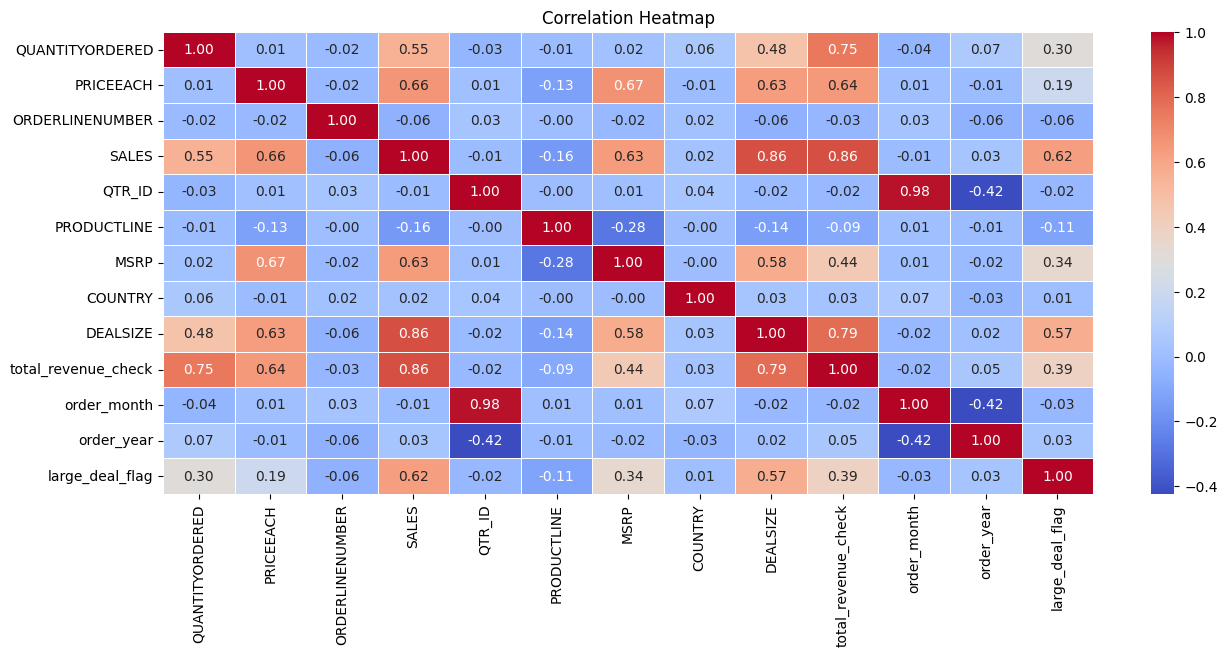

In [40]:
plt.figure(figsize=(15, 6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

features most correlated with SALES are:
- DEALSIZE (0.86)
- total_revenue_check (0.86)
- PRICEEACH (0.66)
- MSRP (0.63)
- large_deal_flag (0.62)
- QUANTITYORDERED (0.55)

### Task 8: Train–Test Split


1. Define the target variable as SALES.
2. Select appropriate input features.
3. Split the dataset into training and testing sets (80/20).

In [42]:
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID',
       'PRODUCTLINE', 'MSRP', 'COUNTRY', 'DEALSIZE', 'total_revenue_check',
       'order_month', 'order_year', 'large_deal_flag'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y = df["SALES"]
X = df.drop(columns=["SALES"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 9: Regression Modeling

1. Train a Linear Regression model to predict SALES.
2. Train an additional model (Ridge / Random Forest Regressor).
3. Evaluate models using:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - R² Score

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
lr = LinearRegression().fit(X_train_scaled, y_train)
ypred_tr_lr = lr.predict(X_train_scaled)
ypred_ts_lr = lr.predict(X_test_scaled)

In [49]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
ypred_tr_ridge = ridge.predict(X_train)
ypred_ts_ridge = ridge.predict(X_test)

In [50]:
rfReg = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1).fit(X_train, y_train)
ypred_tr_rfr = rfReg.predict(X_train)
ypred_ts_rfr = rfReg.predict(X_test)

In [52]:
summary = pd.DataFrame({
    "Models": ["Linear Regression", "Ridge", "Random Forest"],
    "R² test": [
        round(r2_score(y_test, ypred_ts_lr), 3), 
        round(r2_score(y_test, ypred_ts_ridge), 3), 
        round(r2_score(y_test, ypred_ts_rfr), 3)],
    "R² train": [
        round(r2_score(y_train, ypred_tr_lr), 3), 
        round(r2_score(y_train, ypred_tr_ridge), 3), 
        round(r2_score(y_train, ypred_tr_rfr), 3)],
    "MSE test": [
        round(mean_squared_error(y_test, ypred_ts_lr), 3), 
        round(mean_squared_error(y_test, ypred_ts_ridge), 3), 
        round(mean_squared_error(y_test, ypred_ts_rfr), 3)],
    "MSE train": [
        round(mean_squared_error(y_train, ypred_tr_lr), 3), 
        round(mean_squared_error(y_train, ypred_tr_ridge), 3), 
        round(mean_squared_error(y_train, ypred_tr_rfr), 3)],
    "MAE test": [
        round(mean_absolute_error(y_test, ypred_ts_lr), 3),
        round(mean_absolute_error(y_test, ypred_ts_ridge), 3),
        round(mean_absolute_error(y_test, ypred_ts_rfr), 3)],
    "MAE train": [
        round(mean_absolute_error(y_train, ypred_tr_lr), 3),
        round(mean_absolute_error(y_train, ypred_tr_ridge), 3),
        round(mean_absolute_error(y_train, ypred_tr_rfr), 3)], 
})

print(summary)

              Models  R² test  R² train    MSE test   MSE train  MAE test  \
0  Linear Regression    0.904     0.903  292162.621  337293.197   397.140   
1              Ridge    0.904     0.903  291802.999  337314.552   396.851   
2      Random Forest    0.947     0.992  161267.851   28810.870   216.048   

   MAE train  
0    403.398  
1    403.522  
2     82.088  
